<a href="https://colab.research.google.com/github/anuva05/PracticalDeepLearningCourse/blob/master/Lesson4_collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative filtering example

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
#this is what the dataframe for data for a collab model looks like
user,item,title = 'userId','movieId','title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
#Let us create a model from the given data about movie ratings
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [8]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.623453,0.980602,00:01
1,0.829864,0.658444,00:00
2,0.633095,0.657259,00:00


#Movielens dataset

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [9]:
path=Config.data_path()/'ml-100k'
#uploaded the .zip dataset to Colab. Now unzip it
! unzip ml-100k.zip -d {path}



Archive:  ml-100k.zip
   creating: /root/.fastai/data/ml-100k/ml-100k/
  inflating: /root/.fastai/data/ml-100k/ml-100k/allbut.pl  
  inflating: /root/.fastai/data/ml-100k/ml-100k/mku.sh  
  inflating: /root/.fastai/data/ml-100k/ml-100k/README  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.data  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.genre  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.info  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.item  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.occupation  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u.user  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u1.base  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u1.test  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u2.base  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u2.test  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u3.base  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u3.test  
  inflating: /root/.fastai/data/ml-100k/ml-100k/u4.base  


In [10]:
! ls {path}/'ml-100k'


allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [0]:
#read with pandas
path= Config.data_path()/'ml-100k/ml-100k'

In [12]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
#note that encoding is set such that a file that is not unicode can be read
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [13]:
#There are 100k movie ratings
len(ratings)

6031

In [14]:
#group by movie, so that we can see the titles
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,73,1097,4.0,1255504951,"Hate (Haine, La) (1995)"
1,102,1097,4.0,956600083,"Hate (Haine, La) (1995)"
2,665,1097,5.0,992909039,"Hate (Haine, La) (1995)"
3,157,1097,3.0,1291598808,"Hate (Haine, La) (1995)"
4,312,1097,3.0,959935483,"Hate (Haine, La) (1995)"


In [0]:
#Create data bunch object. valid_pct =0.1 means 10% of the dataset is chosen for validation
# Use the movie name in the'title' column as 'item' in the model. 
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

Initially, the weight matrices are initialized to random numbers and we can train them with gradient descent. 

In [16]:
#Take a look at some of the data bunch objects
data.show_batch()

userId,title,target
130,Heavyweights (1994),3.0
313,Crumb (1994),3.0
596,"Wild Bunch, The (1969)",4.0
664,Mortal Kombat (1995),4.0
213,"Fan, The (1996)",3.0


The final activation function is a sigmoid. The range of values should be [0.5,5] rating. However, sigmoids asymptote at the min and max values of the range, so for better accuracy, one trick is to use a range that is [min-0.5 to max + 0.5].Hence, here we use [0,5.5]

In [0]:
y_range=[0,5.5]

In [0]:
# Setup the learner
#Collab_learner creates a learner for collaborative filtering on data. 
#More specifically, it binds data with an EmbeddingDotBias model
# wd= weight decay
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time
0,1.972201,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


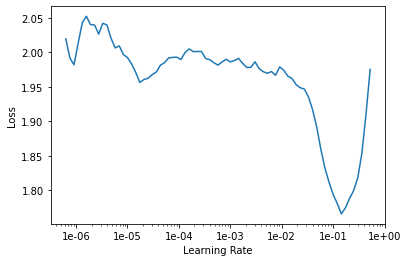

In [19]:
#Find the learning rate
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [20]:
#Train the model for 5 epochs with a learning rate of 5e-3
# which might work well, as seen from above graph
# Model finds latent vectors 
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.887275,1.626771,00:00
1,1.073433,0.581732,00:00
2,0.739032,0.564450,00:00
3,0.601833,0.560359,00:00
4,0.543383,0.557323,00:00


In [0]:
learn.save('dotprod')

[Some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

# Using the model

In [0]:
learn.load('dotprod');

In [23]:
#Look at the model details. EmbeddingDotBias is a Pytorch model to find embeddings.
# It is a standard multi-layer perceptron without biases and one hidden layer
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(100, 40)
  (i_weight): Embedding(71, 40)
  (u_bias): Embedding(100, 1)
  (i_bias): Embedding(71, 1)
)

In [24]:
#These are some top rated movies
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Client, The (1994)', 'Life with Mikey (1993)', 'Promesse, La (1996)', 'Event Horizon (1997)',
       'North by Northwest (1959)', 'Stalingrad (1993)', 'Liebelei (1933)', 'Star Maps (1997)',
       'Savage Nights (Nuits fauves, Les) (1992)', "Schindler's List (1993)"], dtype=object)

#Movie bias

The Embeddings we have learned are a low dimensional representation for users and items. They should contain some interesting features which we can extract to have better insight. 
For the given movies, we extract  biases and mean ratings in order to find out which movies are generally rated low or high (by most users). In most cases, high mean ratings correspond to high biases and vice versa.
However, some movies with high mean rating can have a low bias. Those are probably niche movies rated by a small number of users. Thus, bias turns out to be more descriptive indicator of the phenomenon.

Movie bias - a number that indicates if it is a good movie or not.
User bias - a number that indicates if the user generally gives high ratings to movies or not.
Bias is not necessarily needed in a neural network (you can add a column of ones in place of bias) but if we think it captures important information, we use it. 

In [25]:
#Get movie bias
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([70])

In [0]:
#Group titles by the mean rating
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
#Need to sort the above list by the bias values (which are at index 0)
item0 = lambda o:o[0]

In [28]:
sorted(movie_ratings, key=item0)[:15]
# Bias               Movie                   Rating

[(tensor(-0.0599), 'Fish Called Wanda, A (1988)', 2.411111111111111),
 (tensor(-0.0357), 'Apostle, The (1997)', 2.6160714285714284),
 (tensor(-0.0323), 'Batman Returns (1992)', 2.836734693877551),
 (tensor(-0.0195), 'Clueless (1995)', 2.9545454545454546),
 (tensor(-0.0142), 'Hour of the Pig, The (1993)', 3.0980392156862746),
 (tensor(-0.0104), 'Fly Away Home (1996)', 3.189655172413793),
 (tensor(-0.0099), 'Terminal Velocity (1994)', 3.0357142857142856),
 (tensor(0.0229), 'Shadowlands (1993)', 3.0673076923076925),
 (tensor(0.0290), 'Doom Generation, The (1995)', 3.443396226415094),
 (tensor(0.0354), 'Strange Days (1995)', 3.40625),
 (tensor(0.0364), 'Hellraiser: Bloodline (1996)', 3.5636363636363635),
 (tensor(0.0377), 'Liebelei (1933)', 3.4358974358974357),
 (tensor(0.0394), 'Mouse Hunt (1997)', 3.295918367346939),
 (tensor(0.0406), 'Dumb & Dumber (1994)', 3.2708333333333335),
 (tensor(0.0548), 'Pillow Book, The (1995)', 3.380434782608696)]

In [29]:
#Sort in the reverse order 
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.1863), 'When a Man Loves a Woman (1994)', 4.458333333333333),
 (tensor(0.1858), 'Promesse, La (1996)', 4.475609756097561),
 (tensor(0.1838), 'Amityville: Dollhouse (1996)', 4.484848484848484),
 (tensor(0.1714), 'Event Horizon (1997)', 4.25625),
 (tensor(0.1701), 'Don Juan DeMarco (1995)', 4.285714285714286),
 (tensor(0.1690), 'Wild Bunch, The (1969)', 3.962121212121212),
 (tensor(0.1575), 'Gandhi (1982)', 4.2890625),
 (tensor(0.1563),
  'Savage Nights (Nuits fauves, Les) (1992)',
  4.2727272727272725),
 (tensor(0.1548), "Schindler's List (1993)", 4.331081081081081),
 (tensor(0.1499), 'Guilty as Sin (1993)', 4.241666666666666),
 (tensor(0.1497), 'Spellbound (1945)', 4.1716417910447765),
 (tensor(0.1486), 'Before the Rain (Pred dozhdot) (1994)', 4.236363636363636),
 (tensor(0.1480), 'Virtuosity (1995)', 4.176056338028169),
 (tensor(0.1469), 'Family Thing, A (1996)', 4.241666666666666),
 (tensor(0.1458),
  'In the Realm of the Senses (Ai no corrida) (1976)',
  4.043103448275862

The biases are high for highly rated movies. Eg. The movie Gandhi has 4.2 stars, which is pretty good, and it makes sense that it makes it to the top few results since it was an iconic film, still talked about today.

### Movie weights

In [30]:
#Extract weights of movies. The size of the latent factors vector is 40
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([70, 40])

In [31]:
#Do PCA on the 40 dimensional vectors to reduce dimensions to 3 
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([70, 3])

In [0]:
#Grab the 3 output vectors of PCA and the movies and sort
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [33]:
#Interesting feature0
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9694), 'Amityville: Dollhouse (1996)'),
 (tensor(0.9381), 'Promesse, La (1996)'),
 (tensor(0.8362), 'When a Man Loves a Woman (1994)'),
 (tensor(0.6916), "Schindler's List (1993)"),
 (tensor(0.6710), 'Ghosts of Mississippi (1996)'),
 (tensor(0.6398), 'Guilty as Sin (1993)'),
 (tensor(0.6367), 'Don Juan DeMarco (1995)'),
 (tensor(0.6332), 'Star Wars (1977)'),
 (tensor(0.5972), 'Spellbound (1945)'),
 (tensor(0.5960), 'Before the Rain (Pred dozhdot) (1994)')]

In [34]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2061), 'Fish Called Wanda, A (1988)'),
 (tensor(-0.9548), 'Apostle, The (1997)'),
 (tensor(-0.8168), 'Shadowlands (1993)'),
 (tensor(-0.7646), 'Dumb & Dumber (1994)'),
 (tensor(-0.7200), 'Batman Returns (1992)'),
 (tensor(-0.6684), 'Terminal Velocity (1994)'),
 (tensor(-0.6673), 'Clueless (1995)'),
 (tensor(-0.6465), 'Eraser (1996)'),
 (tensor(-0.5975), 'As Good As It Gets (1997)'),
 (tensor(-0.5499), 'Fly Away Home (1996)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [36]:
#Interesting feature1
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.5584), 'Savage Nights (Nuits fauves, Les) (1992)'),
 (tensor(0.5575), 'Event Horizon (1997)'),
 (tensor(0.4151), 'Virtuosity (1995)'),
 (tensor(0.3748), 'Purple Noon (1960)'),
 (tensor(0.3699), 'Liebelei (1933)'),
 (tensor(0.3085), 'Celtic Pride (1996)'),
 (tensor(0.2397), 'Go Fish (1994)'),
 (tensor(0.2057), 'North by Northwest (1959)'),
 (tensor(0.1764), 'Dumb & Dumber (1994)'),
 (tensor(0.1724), 'Star Trek: Generations (1994)')]

In [37]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.4043), 'White Squall (1996)'),
 (tensor(-0.3398), 'Amos & Andrew (1993)'),
 (tensor(-0.3146), 'Batman Returns (1992)'),
 (tensor(-0.2664), 'Spellbound (1945)'),
 (tensor(-0.2458), 'Hellraiser: Bloodline (1996)'),
 (tensor(-0.2437), 'Terminal Velocity (1994)'),
 (tensor(-0.2409), "One Flew Over the Cuckoo's Nest (1975)"),
 (tensor(-0.2328), 'Mortal Kombat (1995)'),
 (tensor(-0.2209), 'Hugo Pool (1997)'),
 (tensor(-0.2166), 'Star Maps (1997)')]

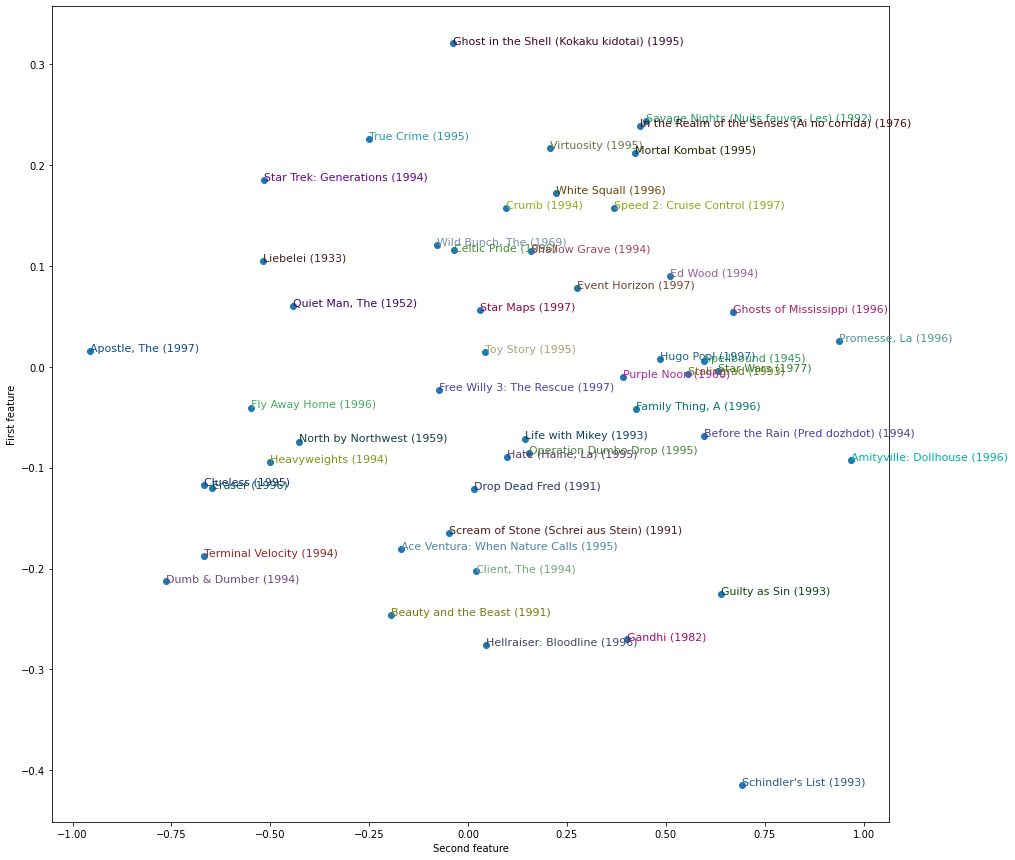

In [42]:
#Plot interesting feature0 vs. interesting feature2 
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
    plt.ylabel('First feature')
    plt.xlabel('Second feature')
plt.show()